# Contents
* [Librairies](#Libraries)
* [Loading](#Loading)
* [Dynamical Functional Connectivity](#Dynamical-Functional-Connectivity)
* [Test](#Test)
* [Calculs des Maximums / Médianes / Déviations](#Calculs-des-Maximums-/-Médianes-/-Déviations)
* [Tableau](#Tableau)
* [Parcellation Représention](#Parcellation-Représention)
* [Test](#TEST)

# Libraries

In [1]:
%pylab inline
import Tools.ext as Te
import Tools.display as Td
import Tools.matrices as Tm
import Tools.functions as Tf
import Connectomes_Jonathan as Cj
import pandas as pd
from IPython.display import HTML
from scipy.stats import ranksums

Populating the interactive namespace from numpy and matplotlib


# Loading

In [2]:
dir_86 = '../../../TimeCourses/Jonathan/86/'
dir_512 = '../../../TimeCourses/Jonathan/512/'
dir_nEEG = '../../../TimeCourses/Jonathan/86_noEEG/'
Reg0 = 'grey_matter_sansSB_sansLCR/'
Reg1 = 'grey_matter_sansSB_sansLCR_sansGlobMean/'

In [6]:
cen512 = Te.data2array('../../../Connectomes/Jonathan/512/centres/t10.npy')
cen86 = Te.data2array('../../../Connectomes/Jonathan/86/centres/t10.txt')
or512 = Te.data2array('../../../Connectomes/Jonathan/ReorderByHemi512.txt').astype(int)[0] 
or86 = Te.data2array('../../../Connectomes/Jonathan/ReorderByHemi86.txt').astype(int)[0]
dow = Te.data2array('../../../Connectomes/Jonathan/AAL512_to_AAL86.txt')[0].astype(int)

In [3]:
KS1 = sorted([k.rstrip('.txt') for k in Te.os.listdir(dir_86 + Reg0)])
KS2 = sorted([k.rstrip('.txt') for k in Te.os.listdir(dir_nEEG + Reg0)])

In [4]:
TC = {'86u':{},'86r':{},'512u':{},'512r':{},'nEu':{},'nEr':{}}
for typ, di, sub in [['86u',  dir_86,   Reg0], ['86r',  dir_86,   Reg1],
                     ['512u', dir_512,  Reg0], ['512r', dir_512,  Reg1],
                     ['nEu',  dir_nEEG, Reg0], ['nEr',  dir_nEEG, Reg1]]:
    if 'nE' in typ: K = KS2
    else:           K = KS1
    for k in K:
        TC[typ][k] = Te.data2array(di + sub + k + '.txt', finite=True).T

# Dynamical Functional Connectivity

In [ ]:
N = 512
rN = arange(N)
for w in [15,30,5,10]:
    for typ in ['512u','512r']:
        print w, typ
        
        for R in range(86):
            try:
                Te.data2array('./DFCs/win_%i_typ_%s_ROI_%i.npy'%(w,typ,R))
            except:
                to_save = {}
                Ns = rN[dow == R]
                n = len(Ns)
                iA = arange( n*N ).reshape((n, N))
                iD = iA[xrange(n), Ns]
                iNs = setdiff1d(iA, iD)

                for k in KS1:
                    FCs = Tf.windowedFCs(TC[typ][k].T, window=w, nodes=Ns)
                    to_save[k] = Tf.fPearsonCorrelation(FCs.reshape((len(FCs), n*N)).T[iNs])
                    del FCs
                    
                Te.array2data(to_save, './DFCs/win_%i_typ_%s_ROI_%i.npy'%(w,typ,R))
                del  Ns, iA, iD, iNs, to_save

# Test

In [61]:
a = rand(10,50)
b = Tf.fCovariance(a, a)[0]
c = Tf.fCovariance(a, a[:,[1,2,5]])[0]
print (b[:,[1,2,5]]==c).all()

True


In [189]:
a = rand(10,50)
b = Tf.fPearsonCorrelation(a, a)
c = Tf.fPearsonCorrelation(a, a[:,[1,2,5]])
print (b[:,[1,2,5]]==c).all()

True


In [300]:
a = randn(100,50)
b = Tf.windowedFCs(a)
c = Tf.windowedFCs(a, nodes=[1,2,5])
print (b[:,[1,2,5]]==c).all()

True


In [326]:
a = rand(100,50)
b = Tf.windowedFCs(a)
c = Tf.windowedFCs(a, nodes=[1,2,5])
d = Tf.windowedCorrelations(b)
e = Tf.windowedCorrelations(c)
print b.shape, c.shape, d.shape, e.shape

1 loops, best of 3: 644 ms per loop
1 loops, best of 3: 360 ms per loop
(90, 50, 50) (90, 3, 50) (90, 90) (90, 90)


In [264]:
a = rand(100,50)
Ns = xrange(50) #[1,2,5]
b1 = Tf.windowedFCs(a)
b2 = Tf.windowedCorrelations(b1)
c1 = Tf.windowedFCs(a, nodes=Ns)
c2 = Tf.windowedCorrelations(c1)
N1,N2 = c1.shape[1], c1.shape[2]
iA = arange(N1*N2).reshape((N1, N2))
iD = iA[xrange(N1), Ns]
iNs = setdiff1d(iA, iD)
d2 = Tf.fPearsonCorrelation(c1.reshape((L,c1.shape[1]*c1.shape[2])).T[iNs])

In [ ]:
%timeit b1 = Tf.windowedFCs(a
%timeit b2 = Tf.fPearsonCorrelation(b1)
%timeit c1 = Tf.windowedFCs(a, nodes=Ns)
%timeit c2 = Tf.windowedCorrelations(c1)
%timeit d2 = Tf.fPearsonCorrelation(c1.reshape((L,c1.shape[1]*c1.shape[2])).T[iNs])

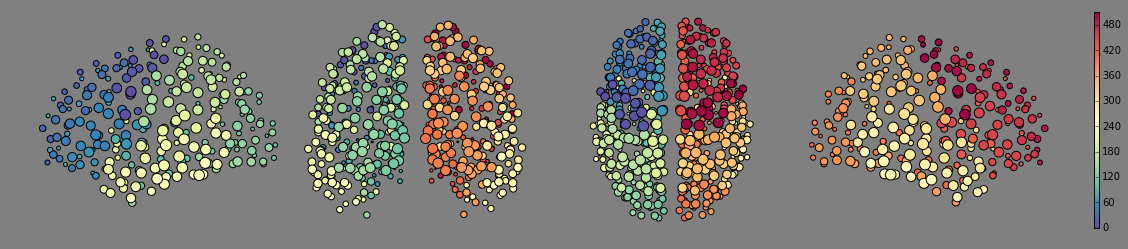

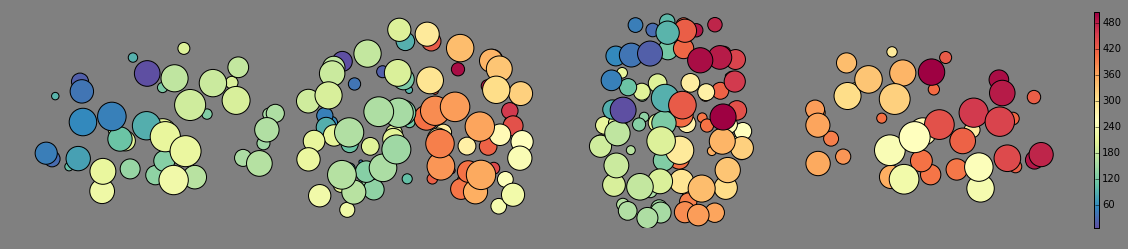

In [40]:
a = arange(512)*1.
b = Td.downsample(a, org=dow)
Td.parcelFromCenters(a, cen512[:,[1,2,3]][or512], s=2, fig=figure(figsize=(15,3)))
Td.parcelFromCenters(b, cen86[:,[1,2,3]][or86], s=20, fig=figure(figsize=(15,3)))

## Calculs des Maximums / Médianes / Déviations

In [ ]:
maxs = Te.data2array('./DFCs/maxs.npy', dic=1)
devs = Te.data2array('./DFCs/devs.npy', dic=1)
meds = Te.data2array('./DFCs/meds.npy', dic=1)

In [ ]:
for w in ['5','10','15','30']:
    for typ in ['512r','512u']:
        print w, typ
        try:
            maxs['p'][w][typ][0]
            continue
        except:
            try:    Te.data2array('./DFCs/win_%s_typ_%s_ROI_%i.npy'%(w,typ,85), dic=1)
            except: continue
            try:
                maxs['p'][w][typ], maxs['t'][w][typ] = {}, {}
                devs['p'][w][typ], devs['t'][w][typ] = {}, {}
                meds['p'][w][typ], meds['t'][w][typ] = {}, {}
            except:
                try:
                    maxs['p'][w], maxs['t'][w] = {typ:{}}, {typ:{}}
                    devs['p'][w], devs['t'][w] = {typ:{}}, {typ:{}}
                    meds['p'][w], meds['t'][w] = {typ:{}}, {typ:{}}
                except:
                    maxs = {'p':{w:{typ:{}}}, 't':{w:{typ:{}}}}
                    devs = {'p':{w:{typ:{}}}, 't':{w:{typ:{}}}}
                    meds = {'p':{w:{typ:{}}}, 't':{w:{typ:{}}}}
        
        for R in range(86):
            DDD = Te.data2array('./DFCs/win_%s_typ_%s_ROI_%i.npy'%(w,typ,R), dic=1)
            maxs['p'][w][typ][R], maxs['t'][w][typ][R] = {}, {}
            devs['p'][w][typ][R], devs['t'][w][typ][R] = {}, {}
            meds['p'][w][typ][R], meds['t'][w][typ][R] = {}, {}
            
            for i in range(100):
                for k in sorted(DDD.keys()):
                    dists = 1.- diag(DDD[k], k=(i+1)*int(w))
                    if len(dists) > 3:
                        h1, b1 = histogram(dists, bins= 2 * Td.nbChiHist(dists))
                        h2, b2 = histogram(dists, bins= sqrt(len(dists)))
                        h3, b3 = histogram(dists, bins= ceil(log2(len(dists)) + 1))
                        h, b = [[h1,b1], [h2,b2], [h3,b3]][argmax([h1.max(), h2.max(), h3.max()])]

                        try:    maxs[k[0]][w][typ][R][str((i+1)*int(w)*4)].append( b[h.argmax()] )
                        except: maxs[k[0]][w][typ][R][str((i+1)*int(w)*4)] = []
                        try:    devs[k[0]][w][typ][R][str((i+1)*int(w)*4)].append( std(dists) )
                        except: devs[k[0]][w][typ][R][str((i+1)*int(w)*4)] = []
                        try:    meds[k[0]][w][typ][R][str((i+1)*int(w)*4)].append( median(dists) )
                        except: meds[k[0]][w][typ][R][str((i+1)*int(w)*4)] = []

In [278]:
Te.array2data(maxs, './DFCs/maxs.npy')
Te.array2data(devs, './DFCs/devs.npy')
Te.array2data(meds, './DFCs/meds.npy')

In [439]:
def table(maxs):
    import pandas as pd
    d1,d2,d3,d4,d5,val = [],[],[],[],[],[]
    tt, pp = maxs['t'], maxs['p']
    
    for w in sorted(tt.keys()):
        for typ in sorted(tt[w].keys()):
            for jp in sorted(tt[w][typ][0].keys()):
                for N in range(86):
                    d1.append(float(w)*4)
                    d2.append(typ[:-1])
                    d3.append((typ[-1] == 'u') * 'NoReg' + (typ[-1] == 'r') * 'Reg')
                    d4.append('%5.2f'%(float(jp)/60))
                    d5.append(N)
                    val.append(100. * ranksums(tt[w][typ][N][jp], pp[w][typ][N][jp])[1] 
                               * (-1.) ** (mean(tt[w][typ][N][jp]) > mean(pp[w][typ][N][jp])) )
                    
    return pd.DataFrame({'window (s)':d1, '# nodes':d2, 'Gbl mean':d3, 'Jump (min)':d4, 'N':d5, 'val':val})

In [440]:
M = table(maxs)
D = table(devs)
E = table(meds)

In [441]:
alljps, twmjps = ['%5.2f'%i for i in arange(1/3.,23,1/3.)], ['%5.2f'%i for i in arange(2.00,21,2)]
jps = setdiff1d(alljps, twmjps)

In [444]:
dM = Td.tableShow(M, ind=['window (s)','Gbl mean','Jump (min)'], uns=['Gbl mean','window (s)'], 
                  spe={'# nodes':['512'], 'N':[75]}, nspe={'Jump (min)':jps}, 
                  cmap=Td.speCmap('coolwarm_r', r=(0,1)), sort=1, nan='', maxs=[-50,50], fmt='%i', justDF=1)
dD = Td.tableShow(D, ind=['window (s)','Gbl mean','Jump (min)'], uns=['Gbl mean','window (s)'], 
                  spe={'# nodes':['512'], 'N':[75]}, nspe={'Jump (min)':jps},         
                  cmap=Td.speCmap('coolwarm_r', r=(0,1)), sort=1, nan='', maxs=[-50,50], fmt='%i', justDF=1)
dE = Td.tableShow(E, ind=['window (s)','Gbl mean','Jump (min)'], uns=['Gbl mean','window (s)'], 
                  spe={'# nodes':['512'], 'N':[75]}, nspe={'Jump (min)':jps},         
                  cmap=Td.speCmap('coolwarm_r', r=(0,1)), sort=1, nan='', maxs=[-50,50], fmt='%i', justDF=1)
S = pd.concat([dM,dE,dD], axis=1, join='outer', keys=['"Distances at Max"','"Medians"','"Deviations"'], names=['p-val (%)'])

In [445]:
HTML(S.to_html(escape=False))

In [449]:
dM = Td.tableShow(M, ind=['window (s)','Gbl mean','Jump (min)'], uns=['Gbl mean','window (s)'], 
                  spe={'# nodes':['512'], 'N':[42]}, nspe={'Jump (min)':jps}, 
                  cmap=Td.speCmap('coolwarm_r', r=(0,1)), sort=1, nan='', maxs=[-50,50], fmt='%i', justDF=1)
dD = Td.tableShow(D, ind=['window (s)','Gbl mean','Jump (min)'], uns=['Gbl mean','window (s)'], 
                  spe={'# nodes':['512'], 'N':[42]}, nspe={'Jump (min)':jps},         
                  cmap=Td.speCmap('coolwarm_r', r=(0,1)), sort=1, nan='', maxs=[-50,50], fmt='%i', justDF=1)
dE = Td.tableShow(E, ind=['window (s)','Gbl mean','Jump (min)'], uns=['Gbl mean','window (s)'], 
                  spe={'# nodes':['512'], 'N':[42]}, nspe={'Jump (min)':jps},         
                  cmap=Td.speCmap('coolwarm_r', r=(0,1)), sort=1, nan='', maxs=[-50,50], fmt='%i', justDF=1)
S = pd.concat([dM,dE,dD], axis=1, join='outer', keys=['"Distances at Max"','"Medians"','"Deviations"'], names=['p-val (%)'])

In [450]:
HTML(S.to_html(escape=False))

In [283]:
HTML(S.to_html(escape=False))